 ## Importation of Libraries

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

%matplotlib inline 

## Data Exploration

In [237]:
train=pd.read_csv("../Data/Train_v2.csv")
test=pd.read_csv("../Data/Test_v2.csv")
sub=pd.read_csv("../Data/SubmissionFile.csv")
variable=pd.read_csv("../Data/VariableDefinitions.csv")

In [238]:
train.head()

country  year    uniqueid bank_account location_type cellphone_access  \
0   Kenya  2018  uniqueid_1          Yes         Rural              Yes   
1   Kenya  2018  uniqueid_2           No         Rural               No   
2   Kenya  2018  uniqueid_3          Yes         Urban              Yes   
3   Kenya  2018  uniqueid_4           No         Rural              Yes   
4   Kenya  2018  uniqueid_5           No         Urban               No   

   household_size  age_of_respondent gender_of_respondent  \
0               3                 24               Female   
1               5                 70               Female   
2               5                 26                 Male   
3               5                 34               Female   
4               8                 26                 Male   

  relationship_with_head           marital_status  \
0                 Spouse  Married/Living together   
1      Head of Household                  Widowed   
2         Other relative     Single/Never Married   
3      Head of Household  Married/Living together   
4                  Child     Single/Never Married   

                   education_level                   job_type  
0              Secondary education              Self employed  
1              No formal education       Government Dependent  
2  Vocational/Specialised training              Self employed  
3                Primary education  Formally employed Private  
4                Primary education        Informally employed

In [239]:
train.shape

(23524, 13)

In [240]:
variable

Variable Definitions                                         Unnamed: 1
0                  country                         Country interviewee is in.
1                     year                           Year survey was done in.
2                 uniqueid             Unique identifier for each interviewee
3            location_type                     Type of location: Rural, Urban
4         cellphone_access  If interviewee has access to a cellphone: Yes, No
5           household_size               Number of people living in one house
6        age_of_respondent                         The age of the interviewee
7     gender_of_respondent                Gender of interviewee: Male, Female
8   relationship_with_head  The interviewee’s relationship with the head o...
9           marital_status  The martial status of the interviewee: Married...
10         education_level  Highest level of education: No formal educatio...
11                job_type  Type of job interviewee has: Farming and Fishi...

In [241]:
sub.sample(5)

uniqueid  bank_account
8972  uniqueid_7681 x Tanzania           NaN
9359    uniqueid_2484 x Uganda           NaN
9572    uniqueid_2402 x Uganda           NaN
1691     uniqueid_6831 x Kenya           NaN
1039     uniqueid_7069 x Kenya           NaN

In [242]:
test.head()

country  year       uniqueid location_type cellphone_access  household_size  \
0   Kenya  2018  uniqueid_6056         Urban              Yes               3   
1   Kenya  2018  uniqueid_6060         Urban              Yes               7   
2   Kenya  2018  uniqueid_6065         Rural               No               3   
3   Kenya  2018  uniqueid_6072         Rural               No               6   
4   Kenya  2018  uniqueid_6073         Urban               No               3   

   age_of_respondent gender_of_respondent relationship_with_head  \
0                 30                 Male      Head of Household   
1                 51                 Male      Head of Household   
2                 77               Female                 Parent   
3                 39               Female      Head of Household   
4                 16                 Male                  Child   

            marital_status                  education_level  \
0  Married/Living together              Secondary education   
1  Married/Living together  Vocational/Specialised training   
2  Married/Living together              No formal education   
3  Married/Living together                Primary education   
4     Single/Never Married              Secondary education   

                       job_type  
0  Formally employed Government  
1     Formally employed Private  
2          Remittance Dependent  
3          Remittance Dependent  
4          Remittance Dependent

In [243]:
test.shape

(10086, 12)

In [244]:
train.describe()

year  household_size  age_of_respondent
count  23524.000000    23524.000000       23524.000000
mean    2016.975939        3.797483          38.805220
std        0.847371        2.227613          16.520569
min     2016.000000        1.000000          16.000000
25%     2016.000000        2.000000          26.000000
50%     2017.000000        3.000000          35.000000
75%     2018.000000        5.000000          49.000000
max     2018.000000       21.000000         100.000000

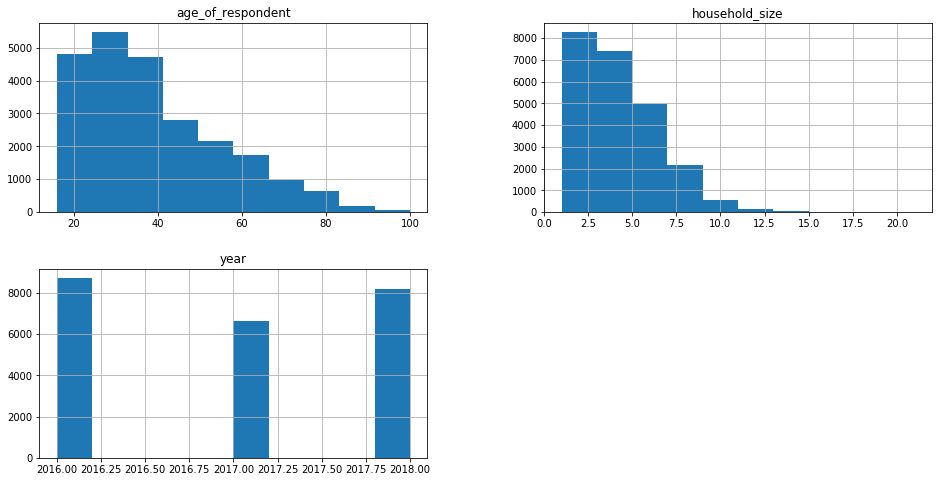

In [245]:
train.hist(figsize=(16,8));

In [246]:
train.groupby('bank_account').hist(figsize=(16,8));

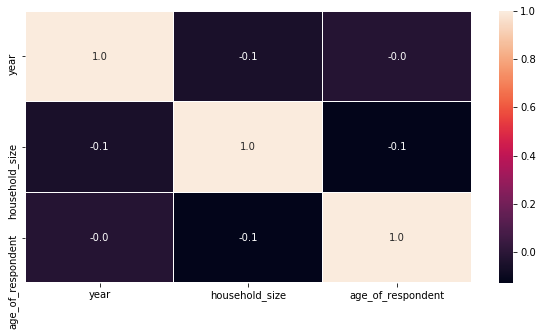

In [247]:
f,ax = plt.subplots(figsize=(10, 5))
sns.heatmap(train.corr(), annot=True, linewidths=.05, fmt= '.1f',ax=ax)

In [248]:
train.bank_account.value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

In [249]:
# Students' Marks in Math is absolutely correlated with Science
labels = ['yes Fraud', 'No Fraud']
sizes = [train['bank_account'].value_counts()[0],
         train['bank_account'].value_counts()[1]
        ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title('Yes Fraud vs No Fraud Pie Chart', fontsize=20)
plt.show()

## Data Wrangling

In [250]:
train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [251]:
train.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

In [252]:
#import preprocessing module 
from sklearn.preprocessing import LabelEncoder
 
# Convert target label to numerical Data
le = LabelEncoder()
train['bank_account'] = le.fit_transform(train['bank_account'])
train['location_type'] = le.fit_transform(train['location_type'])
train['cellphone_access'] = le.fit_transform(train['cellphone_access'])
train['gender_of_respondent'] = le.fit_transform(train['gender_of_respondent'])


train.head()

country  year    uniqueid  bank_account  location_type  cellphone_access  \
0   Kenya  2018  uniqueid_1             1              0                 1   
1   Kenya  2018  uniqueid_2             0              0                 0   
2   Kenya  2018  uniqueid_3             1              1                 1   
3   Kenya  2018  uniqueid_4             0              0                 1   
4   Kenya  2018  uniqueid_5             0              1                 0   

   household_size  age_of_respondent  gender_of_respondent  \
0               3                 24                     0   
1               5                 70                     0   
2               5                 26                     1   
3               5                 34                     0   
4               8                 26                     1   

  relationship_with_head           marital_status  \
0                 Spouse  Married/Living together   
1      Head of Household                  Widowed   
2         Other relative     Single/Never Married   
3      Head of Household  Married/Living together   
4                  Child     Single/Never Married   

                   education_level                   job_type  
0              Secondary education              Self employed  
1              No formal education       Government Dependent  
2  Vocational/Specialised training              Self employed  
3                Primary education  Formally employed Private  
4                Primary education        Informally employed

In [253]:
train["year"].unique()

array([2018, 2016, 2017])

In [254]:
train["location_type"].unique()

array([0, 1])

In [255]:
train["cellphone_access"].unique()

array([1, 0])

In [256]:
train["marital_status"].unique()

array(['Married/Living together', 'Widowed', 'Single/Never Married',
       'Divorced/Seperated', 'Dont know'], dtype=object)

In [257]:
train["education_level"].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

In [258]:
train["job_type"].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

In [259]:
train.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account               int64
location_type              int64
cellphone_access           int64
household_size             int64
age_of_respondent          int64
gender_of_respondent       int64
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

In [260]:
#Now,can not use columns with character datatype. Creating Dummy variables instead
columns_to_transform = ['marital_status','job_type']
train = pd.get_dummies( train,columns = columns_to_transform)
train.head()

country  year    uniqueid  bank_account  location_type  cellphone_access  \
0   Kenya  2018  uniqueid_1             1              0                 1   
1   Kenya  2018  uniqueid_2             0              0                 0   
2   Kenya  2018  uniqueid_3             1              1                 1   
3   Kenya  2018  uniqueid_4             0              0                 1   
4   Kenya  2018  uniqueid_5             0              1                 0   

   household_size  age_of_respondent  gender_of_respondent  \
0               3                 24                     0   
1               5                 70                     0   
2               5                 26                     1   
3               5                 34                     0   
4               8                 26                     1   

  relationship_with_head  ... job_type_Dont Know/Refuse to answer  \
0                 Spouse  ...                                   0   
1      Head of Household  ...                                   0   
2         Other relative  ...                                   0   
3      Head of Household  ...                                   0   
4                  Child  ...                                   0   

   job_type_Farming and Fishing  job_type_Formally employed Government  \
0                             0                                      0   
1                             0                                      0   
2                             0                                      0   
3                             0                                      0   
4                             0                                      0   

   job_type_Formally employed Private  job_type_Government Dependent  \
0                                   0                              0   
1                                   0                              1   
2                                   0                              0   
3                                   1                              0   
4                                   0                              0   

   job_type_Informally employed  job_type_No Income  job_type_Other Income  \
0                             0                   0                      0   
1                             0                   0                      0   
2                             0                   0                      0   
3                             0                   0                      0   
4                             1                   0                      0   

   job_type_Remittance Dependent  job_type_Self employed  
0                              0                       1  
1                              0                       0  
2                              0                       1  
3                              0                       0  
4                              0                       0  

[5 rows x 26 columns]

In [261]:
data.columns


Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [262]:
train=train.drop(["uniqueid","country","relationship_with_head"],axis=1)

In [263]:
# Separate majority and minority classes
data_majority = train[train.bank_account==1]
data_minority = train[train.bank_account==0]

In [264]:
""""
# Upsample minority class
data_minority_upsampled = resample(data_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=20212,    # to match majority class
                        ) # reproducible results
 """

'"\n# Upsample minority class\ndata_minority_upsampled = resample(data_minority, \n                                 replace=True,     # sample with replacement\n                                 n_samples=20212,    # to match majority class\n                        ) # reproducible results\n '

In [265]:
# Combine majority class with upsampled minority class
#data_upsampled = pd.concat([data_majority, data_minority_upsampled])

In [266]:
# Display new class counts
#data_upsampled.bank_account_Yes.value_counts()
train.bank_account.value_counts()

0    20212
1     3312
Name: bank_account, dtype: int64

In [267]:
train.dtypes

year                                       int64
bank_account                               int64
location_type                              int64
cellphone_access                           int64
household_size                             int64
age_of_respondent                          int64
gender_of_respondent                       int64
education_level                           object
marital_status_Divorced/Seperated          uint8
marital_status_Dont know                   uint8
marital_status_Married/Living together     uint8
marital_status_Single/Never Married        uint8
marital_status_Widowed                     uint8
job_type_Dont Know/Refuse to answer        uint8
job_type_Farming and Fishing               uint8
job_type_Formally employed Government      uint8
job_type_Formally employed Private         uint8
job_type_Government Dependent              uint8
job_type_Informally employed               uint8
job_type_No Income                         uint8
job_type_Other Incom

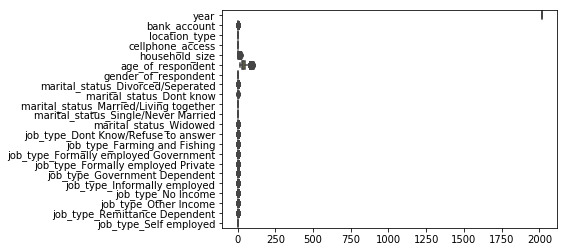

In [268]:
# Checking outliers
fig, ax = plt.subplots()
sns.boxplot(data=train, orient='h')
plt.show()

In [269]:
""""
Q3, Q1 = np.percentile(data_upsampled['household_size'], [75, 25])
iqr = Q3 - Q1
whisker = Q1 + (1.5*iqr)
print('Inter quatile range: ', iqr)
print('Whisker            : ', whisker)

data_upsampled["household_size"] = data_upsampled['household_size'].clip(lower=whisker) """"

SyntaxError: EOL while scanning string literal (<ipython-input-269-309a079bbed4>, line 8)

In [ ]:

""""Q3, Q1 = np.percentile(data_upsampled['age_of_respondent'], [75, 25])
iqr = Q3 - Q1
whisker = Q1 + (1.5*iqr)
print('Inter quatile range: ', iqr)
print('Whisker            : ', whisker)

data_upsampled["age_of_respondent"] = data_upsampled['age_of_respondent'].clip(lower=whisker)

In [270]:
""""
fig, ax = plt.subplots()
sns.boxplot(data=data_upsampled, orient='h')
plt.show()

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-270-6f4b9442d598>, line 4)

## Cleaning Test Data

In [271]:
test.head()

country  year       uniqueid location_type cellphone_access  household_size  \
0   Kenya  2018  uniqueid_6056         Urban              Yes               3   
1   Kenya  2018  uniqueid_6060         Urban              Yes               7   
2   Kenya  2018  uniqueid_6065         Rural               No               3   
3   Kenya  2018  uniqueid_6072         Rural               No               6   
4   Kenya  2018  uniqueid_6073         Urban               No               3   

   age_of_respondent gender_of_respondent relationship_with_head  \
0                 30                 Male      Head of Household   
1                 51                 Male      Head of Household   
2                 77               Female                 Parent   
3                 39               Female      Head of Household   
4                 16                 Male                  Child   

            marital_status                  education_level  \
0  Married/Living together              Secondary education   
1  Married/Living together  Vocational/Specialised training   
2  Married/Living together              No formal education   
3  Married/Living together                Primary education   
4     Single/Never Married              Secondary education   

                       job_type  
0  Formally employed Government  
1     Formally employed Private  
2          Remittance Dependent  
3          Remittance Dependent  
4          Remittance Dependent

In [272]:
#Now,can not use columns with character datatype. Creating Dummy variables instead
columns_to_transform = [ 'marital_status','job_type']
test = pd.get_dummies( test,columns = columns_to_transform )
test.head()

country  year       uniqueid location_type cellphone_access  household_size  \
0   Kenya  2018  uniqueid_6056         Urban              Yes               3   
1   Kenya  2018  uniqueid_6060         Urban              Yes               7   
2   Kenya  2018  uniqueid_6065         Rural               No               3   
3   Kenya  2018  uniqueid_6072         Rural               No               6   
4   Kenya  2018  uniqueid_6073         Urban               No               3   

   age_of_respondent gender_of_respondent relationship_with_head  \
0                 30                 Male      Head of Household   
1                 51                 Male      Head of Household   
2                 77               Female                 Parent   
3                 39               Female      Head of Household   
4                 16                 Male                  Child   

                   education_level  ...  job_type_Dont Know/Refuse to answer  \
0              Secondary education  ...                                    0   
1  Vocational/Specialised training  ...                                    0   
2              No formal education  ...                                    0   
3                Primary education  ...                                    0   
4              Secondary education  ...                                    0   

   job_type_Farming and Fishing  job_type_Formally employed Government  \
0                             0                                      1   
1                             0                                      0   
2                             0                                      0   
3                             0                                      0   
4                             0                                      0   

   job_type_Formally employed Private  job_type_Government Dependent  \
0                                   0                              0   
1                                   1                              0   
2                                   0                              0   
3                                   0                              0   
4                                   0                              0   

   job_type_Informally employed  job_type_No Income  job_type_Other Income  \
0                             0                   0                      0   
1                             0                   0                      0   
2                             0                   0                      0   
3                             0                   0                      0   
4                             0                   0                      0   

   job_type_Remittance Dependent  job_type_Self employed  
0                              0                       0  
1                              0                       0  
2                              1                       0  
3                              1                       0  
4                              1                       0  

[5 rows x 25 columns]

In [273]:
# Convert target label to numerical Data
le = LabelEncoder()
#test['bank_account'] = le.fit_transform(test['bank_account'])
test['location_type'] = le.fit_transform(test['location_type'])
test['cellphone_access'] = le.fit_transform(test['cellphone_access'])
test['gender_of_respondent'] = le.fit_transform(test['gender_of_respondent'])


test.head()

country  year       uniqueid  location_type  cellphone_access  \
0   Kenya  2018  uniqueid_6056              1                 1   
1   Kenya  2018  uniqueid_6060              1                 1   
2   Kenya  2018  uniqueid_6065              0                 0   
3   Kenya  2018  uniqueid_6072              0                 0   
4   Kenya  2018  uniqueid_6073              1                 0   

   household_size  age_of_respondent  gender_of_respondent  \
0               3                 30                     1   
1               7                 51                     1   
2               3                 77                     0   
3               6                 39                     0   
4               3                 16                     1   

  relationship_with_head                  education_level  ...  \
0      Head of Household              Secondary education  ...   
1      Head of Household  Vocational/Specialised training  ...   
2                 Parent              No formal education  ...   
3      Head of Household                Primary education  ...   
4                  Child              Secondary education  ...   

   job_type_Dont Know/Refuse to answer  job_type_Farming and Fishing  \
0                                    0                             0   
1                                    0                             0   
2                                    0                             0   
3                                    0                             0   
4                                    0                             0   

   job_type_Formally employed Government  job_type_Formally employed Private  \
0                                      1                                   0   
1                                      0                                   1   
2                                      0                                   0   
3                                      0                                   0   
4                                      0                                   0   

   job_type_Government Dependent  job_type_Informally employed  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
3                              0                             0   
4                              0                             0   

   job_type_No Income  job_type_Other Income  job_type_Remittance Dependent  \
0                   0                      0                              0   
1                   0                      0                              0   
2                   0                      0                              1   
3                   0                      0                              1   
4                   0                      0                              1   

   job_type_Self employed  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  

[5 rows x 25 columns]

In [274]:
test=test.drop(["uniqueid","country","relationship_with_head"], axis=1)

In [275]:
test.dtypes

year                                       int64
location_type                              int64
cellphone_access                           int64
household_size                             int64
age_of_respondent                          int64
gender_of_respondent                       int64
education_level                           object
marital_status_Divorced/Seperated          uint8
marital_status_Dont know                   uint8
marital_status_Married/Living together     uint8
marital_status_Single/Never Married        uint8
marital_status_Widowed                     uint8
job_type_Dont Know/Refuse to answer        uint8
job_type_Farming and Fishing               uint8
job_type_Formally employed Government      uint8
job_type_Formally employed Private         uint8
job_type_Government Dependent              uint8
job_type_Informally employed               uint8
job_type_No Income                         uint8
job_type_Other Income                      uint8
job_type_Remittance 

In [276]:
test=test.drop(["education_level"], axis=1)

In [277]:
train=train.drop(["education_level"], axis=1)

In [278]:
test.describe()

year  location_type  cellphone_access  household_size  \
count  10086.000000   10086.000000      10086.000000    10086.000000   
mean    2016.975907       0.386377          0.749455        3.778802   
std        0.847356       0.486943          0.433349        2.212721   
min     2016.000000       0.000000          0.000000        1.000000   
25%     2016.000000       0.000000          0.000000        2.000000   
50%     2017.000000       0.000000          1.000000        3.000000   
75%     2018.000000       1.000000          1.000000        5.000000   
max     2018.000000       1.000000          1.000000       20.000000   

       age_of_respondent  gender_of_respondent  \
count       10086.000000          10086.000000   
mean           38.308348              0.420286   
std            16.270053              0.493629   
min            16.000000              0.000000   
25%            26.000000              0.000000   
50%            35.000000              0.000000   
75%            48.000000              1.000000   
max           100.000000              1.000000   

       marital_status_Divorced/Seperated  marital_status_Dont know  \
count                       10086.000000              10086.000000   
mean                            0.086060                  0.000099   
std                             0.280466                  0.009957   
min                             0.000000                  0.000000   
25%                             0.000000                  0.000000   
50%                             0.000000                  0.000000   
75%                             0.000000                  0.000000   
max                             1.000000                  1.000000   

       marital_status_Married/Living together  \
count                            10086.000000   
mean                                 0.462324   
std                                  0.498603   
min                                  0.000000   
25%                                  0.000000   
50%                                  0.000000   
75%                                  1.000000   
max                                  1.000000   

       marital_status_Single/Never Married  ...  \
count                         10086.000000  ...   
mean                              0.341761  ...   
std                               0.474323  ...   
min                               0.000000  ...   
25%                               0.000000  ...   
50%                               0.000000  ...   
75%                               1.000000  ...   
max                               1.000000  ...   

       job_type_Dont Know/Refuse to answer  job_type_Farming and Fishing  \
count                         10086.000000                  10086.000000   
mean                              0.005453                      0.234979   
std                               0.073647                      0.424007   
min                               0.000000                      0.000000   
25%                               0.000000                      0.000000   
50%                               0.000000                      0.000000   
75%                               0.000000                      0.000000   
max                               1.000000                      1.000000   

       job_type_Formally employed Government  \
count                           10086.000000   
mean                                0.016458   
std                                 0.127237   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 0.000000   
max                                 1.000000   

       job_type_Formally employed Private  job_type_Government Dependent  \
count                        10086.000000                   10086.000000   
mean                             0.044021                       0.009915   
std                              0.2

## feature selection

In [279]:
X=train.drop("bank_account", axis=1)
y=train["bank_account"]

In [280]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: bank_account, dtype: int64

In [281]:
X.head()

year  location_type  cellphone_access  household_size  age_of_respondent  \
0  2018              0                 1               3                 24   
1  2018              0                 0               5                 70   
2  2018              1                 1               5                 26   
3  2018              0                 1               5                 34   
4  2018              1                 0               8                 26   

   gender_of_respondent  marital_status_Divorced/Seperated  \
0                     0                                  0   
1                     0                                  0   
2                     1                                  0   
3                     0                                  0   
4                     1                                  0   

   marital_status_Dont know  marital_status_Married/Living together  \
0                         0                                       1   
1                         0                                       0   
2                         0                                       0   
3                         0                                       1   
4                         0                                       0   

   marital_status_Single/Never Married  ...  \
0                                    0  ...   
1                                    0  ...   
2                                    1  ...   
3                                    0  ...   
4                                    1  ...   

   job_type_Dont Know/Refuse to answer  job_type_Farming and Fishing  \
0                                    0                             0   
1                                    0                             0   
2                                    0                             0   
3                                    0                             0   
4                                    0                             0   

   job_type_Formally employed Government  job_type_Formally employed Private  \
0                                      0                                   0   
1                                      0                                   0   
2                                      0                                   0   
3                                      0                                   1   
4                                      0                                   0   

   job_type_Government Dependent  job_type_Informally employed  \
0                              0                             0   
1                              1                             0   
2                              0                             0   
3                              0                             0   
4                              0                             1   

   job_type_No Income  job_type_Other Income  job_type_Remittance Dependent  \
0                   0                      0                              0   
1                   0                      0                              0   
2                   0                      0                              0   
3                   0                      0                              0   
4                   0                      0                              0   

   job_type_Self employed  
0                       1  
1                       0  
2                       1  
3                       0  
4                       0  

[5 rows x 21 columns]

## Model selection

In [282]:
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=123)

In [283]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [284]:
models = []

models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=4000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=10000)))
models.append(('SVC', SVC(gamma='scale')))
models.append(('GB', GradientBoostingClassifier()))
models.append(('GNB', GaussianNB()))

In [175]:
names = []
scores = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

results = pd.DataFrame({'Model': names, 'Accuracy': scores})
results

Model  Accuracy
0    LR  0.868560
1   KNN  0.857847
2    DT  0.830301
3    RF  0.849005
4   SVC  0.861758
5    GB  0.874681
6   GNB  0.852236

In [176]:
#comparison btn actual and predicted values
evaluate=pd.DataFrame({"Actual": y_test,"predicted":y_pred})
evaluate.sample(5)

Actual  predicted
12895       0          0
5883        0          1
19149       0          0
11537       0          1
3197        1          0

In [285]:
# fit by setting best parameters and Evaluate model
mygbm = GradientBoostingClassifier()

mygbm.fit(X_train, y_train)

pred = mygbm.predict((X_test))
                     
# Get accuracy
print("Accuracy is: ", accuracy_score(y_test, pred))


Accuracy is:  0.8746811766706343


In [286]:
# Get the predicted result for the test Data
test.bank_account = mygbm.predict(test)

/home/tony/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [289]:
test_1=pd.read_csv("../Data/Test_v2.csv")
test_1.head()

country  year       uniqueid location_type cellphone_access  household_size  \
0   Kenya  2018  uniqueid_6056         Urban              Yes               3   
1   Kenya  2018  uniqueid_6060         Urban              Yes               7   
2   Kenya  2018  uniqueid_6065         Rural               No               3   
3   Kenya  2018  uniqueid_6072         Rural               No               6   
4   Kenya  2018  uniqueid_6073         Urban               No               3   

   age_of_respondent gender_of_respondent relationship_with_head  \
0                 30                 Male      Head of Household   
1                 51                 Male      Head of Household   
2                 77               Female                 Parent   
3                 39               Female      Head of Household   
4                 16                 Male                  Child   

            marital_status                  education_level  \
0  Married/Living together              Secondary education   
1  Married/Living together  Vocational/Specialised training   
2  Married/Living together              No formal education   
3  Married/Living together                Primary education   
4     Single/Never Married              Secondary education   

                       job_type  
0  Formally employed Government  
1     Formally employed Private  
2          Remittance Dependent  
3          Remittance Dependent  
4          Remittance Dependent

In [291]:
# create submission DataFrame
submission = pd.DataFrame({"uniqueid": test_1["uniqueid"] + " x " + test_1["country"],"bank_account": test.bank_account})

In [293]:
#show the five sample
submission.sample(5)

uniqueid  bank_account
8168  uniqueid_8443 x Tanzania             1
8958  uniqueid_9233 x Tanzania             0
6669  uniqueid_6944 x Tanzania             0
805      uniqueid_6874 x Kenya             0
9127  uniqueid_9402 x Tanzania             0

In [294]:
submission.head()

uniqueid  bank_account
0  uniqueid_6056 x Kenya             1
1  uniqueid_6060 x Kenya             1
2  uniqueid_6065 x Kenya             0
3  uniqueid_6072 x Kenya             0
4  uniqueid_6073 x Kenya             0

In [295]:
# Create submission csv file
#This is saved in the same directory as your notebook
filename = 'my_submission.csv'

submission.to_csv(filename,index=False)
